In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
 
X1 = pd.read_csv('/content/Wholesale customers data.csv')
 

 
# Dropping the CUST_ID column from the data

 
# Handling the missing values
X1.fillna(method ='ffill', inplace = True)
X1=X1[:1000]

In [6]:
X1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)
 
# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized1 = normalize(X_scaled1)
 
# Converting the numpy array into a pandas DataFrame
X_normalized1 = pd.DataFrame(X_normalized1,columns=X1.columns)

In [8]:
X_normalized1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.825480,0.336578,0.030163,0.298343,-0.023428,-0.335837,-0.024827,-0.037802
1,0.834375,0.340205,-0.225377,0.313590,0.098098,-0.155590,0.049767,0.051348
2,0.515929,0.210363,-0.159207,0.145498,-0.010028,-0.048983,0.047450,0.798935
3,-0.475362,0.406755,0.068940,-0.429722,-0.270618,0.473191,-0.343345,0.064326
4,0.652120,0.265893,0.378239,-0.023587,-0.035723,0.078264,-0.104399,0.584909


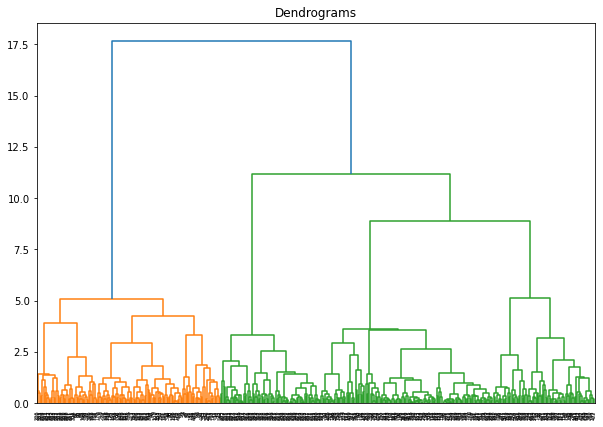

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_normalized1, method='ward'))

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y=cluster.fit_predict(X_normalized1)

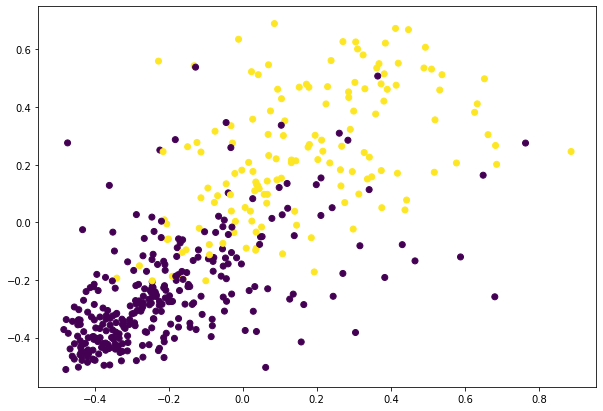

In [11]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_normalized1['Milk'], X_normalized1['Grocery'], c=cluster.labels_) 
